In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
# df = pd.read_csv('spam_or_not_spam.csv')
df = pd.read_csv('spamEmail.csv')

In [93]:
df.head()

,email,class
0,Ngày thứ tư số AUG Số số Số Số Số Số từ Chris ...,0
1,Martin A đã đăng Tassos Papadopoulos Nhà điêu ...,0
2,Người đàn ông đe dọa vụ nổ ở Moscow Thứ Năm số...,0
3,Klez Virus đã thắng được một loại virus sung m...,0
4,Ngoài việc thêm kem vào spaghetti carbonara có...,0


In [90]:
# df.describe()

,class
count,2999.000000
mean,0.166389
std,0.372491
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [78]:
X = list(df['email'])
y = list(df['class'])

In [79]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
knn.fit(X_train_dtm,y_train)
y_pred = knn.predict(X_test_dtm)

In [81]:
print(X_train_dtm.shape)
print(X_test_dtm.shape)
print("Score: ",accuracy_score(y_pred, y_test)*100)

(2399, 13247)
(600, 13247)
Score:  93.0


In [82]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[479  27]
 [ 15  79]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       506
           1       0.75      0.84      0.79        94

    accuracy                           0.93       600
   macro avg       0.86      0.89      0.87       600
weighted avg       0.93      0.93      0.93       600



In [83]:
new=input()
print(new)
dtm = vect.transform(pd.Series(new))
if knn.predict(dtm)==1:
    print("This message is spam")
else:
    print("This message is not spam")

NAY EM RẢNH KHÔNG SANG ANH CHƠI
This message is not spam


In [84]:
error = []
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_dtm, y_train)
    pred_i = knn.predict(X_test_dtm)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

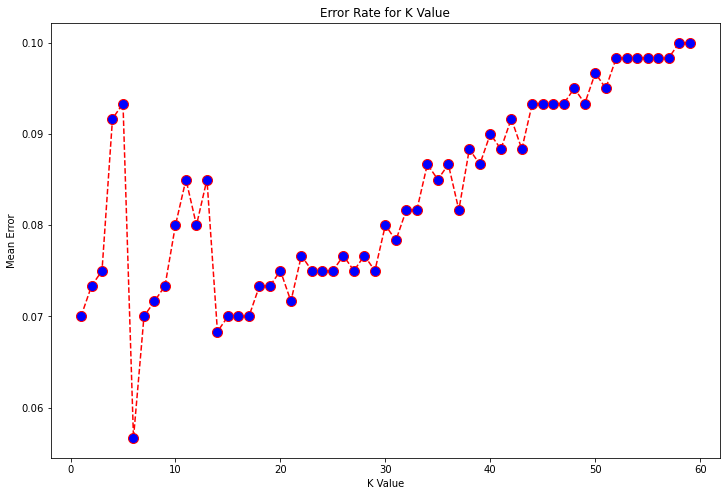

In [85]:
plt.figure(figsize=(12,8))
plt.plot(range(1,60), error, color="red", linestyle="dashed",
        marker="o",markerfacecolor="blue",markersize=10)
plt.title("Error Rate for K Value")
plt.xlabel("K Value") 
plt.ylabel("Mean Error")

In [86]:
k = np.arange(1,60,2)
params = {"n_neighbors" : k}
random_search = RandomizedSearchCV(KNeighborsClassifier(), params, n_iter=5, cv=5, n_jobs=-1, verbose=0)
random_search .fit(X_train_dtm, y_train)
print("train score - " + str(random_search .score(X_train_dtm, y_train)))
print("test score - " + str(random_search .score(X_test_dtm, y_test)))

train score - 0.9341392246769488
test score - 0.9266666666666666


In [87]:
print(random_search.best_params_)

{'n_neighbors': 19}
